In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r"/mnt/c/Rig/Pandoras BOX/Aadhar/Refined enrollment.csv")

In [36]:
df["Month"].value_counts()

Month
9     356059
11    272791
10    211883
12    161966
7       1184
4        847
6        582
5        549
3        168
Name: count, dtype: int64

In [41]:
df[df["Month"]==10]

,state,district,pincode,age_0_5,age_5_17,age_18_greater,Total Registrations,Day,Month
359389,PUNJAB,Jalandhar,144041,2,1,0,3,13,10
359390,PUNJAB,Jalandhar,144101,1,0,0,1,13,10
359391,PUNJAB,Jalandhar,144102,2,0,0,2,13,10
359392,PUNJAB,Jalandhar,144418,1,0,0,1,13,10
359393,PUNJAB,Jalandhar,144419,1,0,0,1,13,10
...,...,...,...,...,...,...,...,...,...
571267,GUJARAT,Dahod,389175,1,2,0,3,31,10
571268,GUJARAT,Dahod,389190,7,1,0,8,31,10
571269,GUJARAT,Dahod,389382,5,0,0,5,31,10
571270,GUJARAT,Devbhumi Dwarka,360510,3,0,0,3,31,10


In [3]:
df.head()

,state,district,pincode,age_0_5,age_5_17,age_18_greater,Total Registrations,Day,Month
0,MEGHALAYA,East Khasi Hills,793121,11,61,37,109,2,3
1,KARNATAKA,Bengaluru Urban,560043,14,33,39,86,9,3
2,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,123,9,3
3,UTTAR PRADESH,Aligarh,202133,62,29,15,106,9,3
4,KARNATAKA,Bengaluru Urban,560016,14,16,21,51,9,3


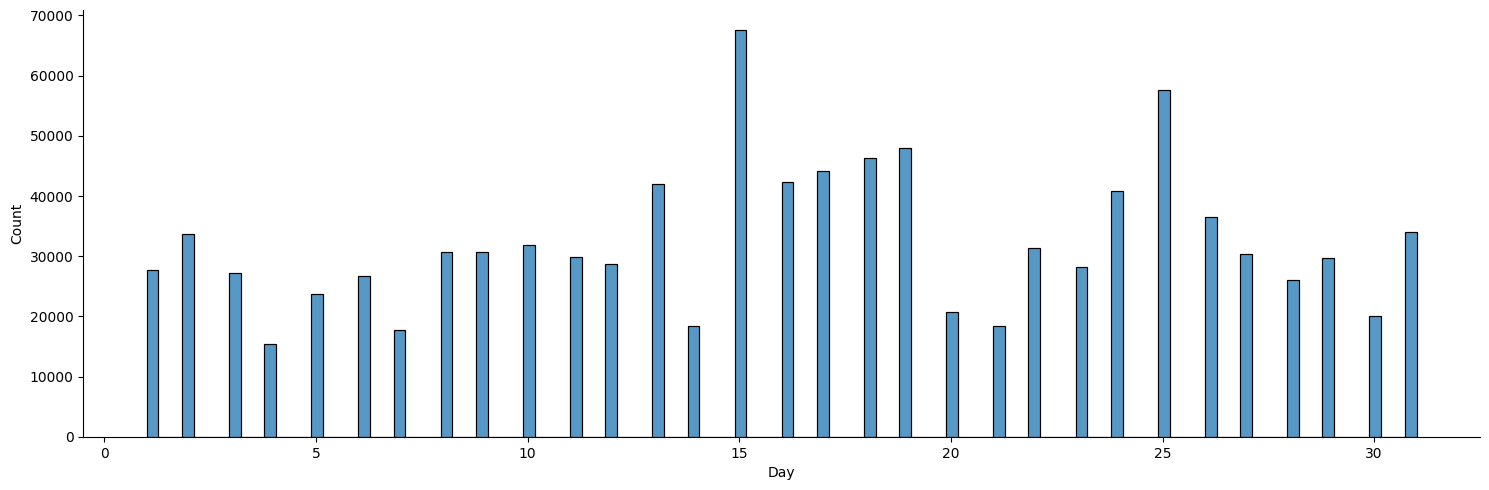

In [13]:
sns.displot(x=df["Day"], aspect=3)

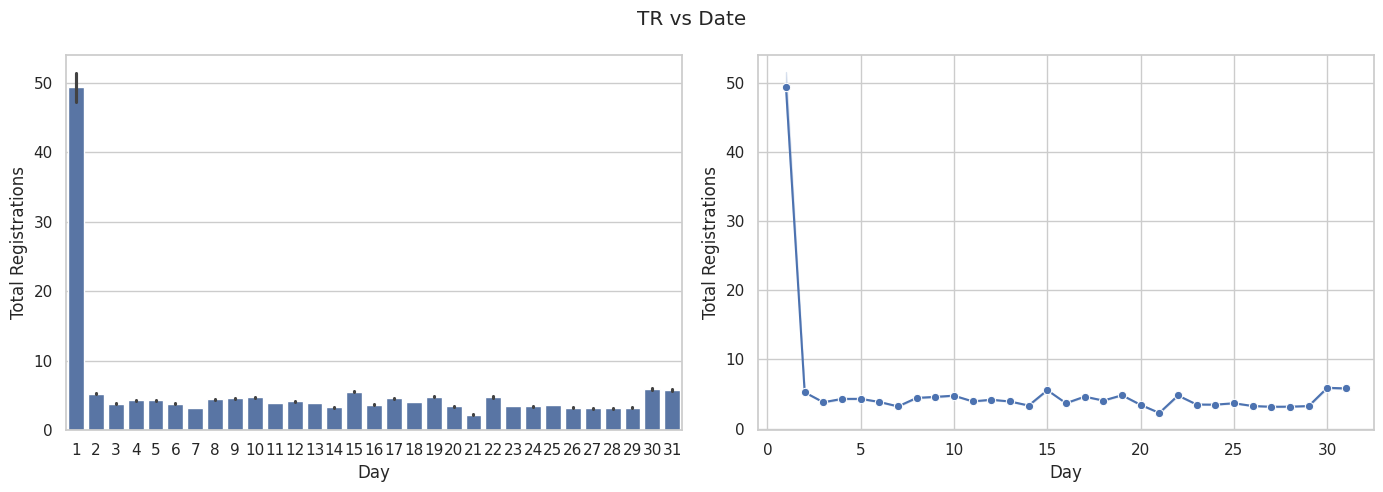

In [73]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(40, 5))

fig, (axes) = plt.subplots(1,2,figsize=(14, 5))
fig.suptitle("TR vs Date")
sns.barplot(data=df, x="Day", y="Total Registrations",ax=axes[0])
sns.lineplot(data=df, x="Day", y="Total Registrations", marker='o',ax=axes[1])

plt.tight_layout()
plt.show()

In [45]:
# Most enrollment entries happen on 15th date.
# However Maximum aggregate total registrations(bulk volume) happen on first of an average month

# ⚠️ Do not include Day 1 in trend analysis without justification. It is really high and maybe due to backlog dump

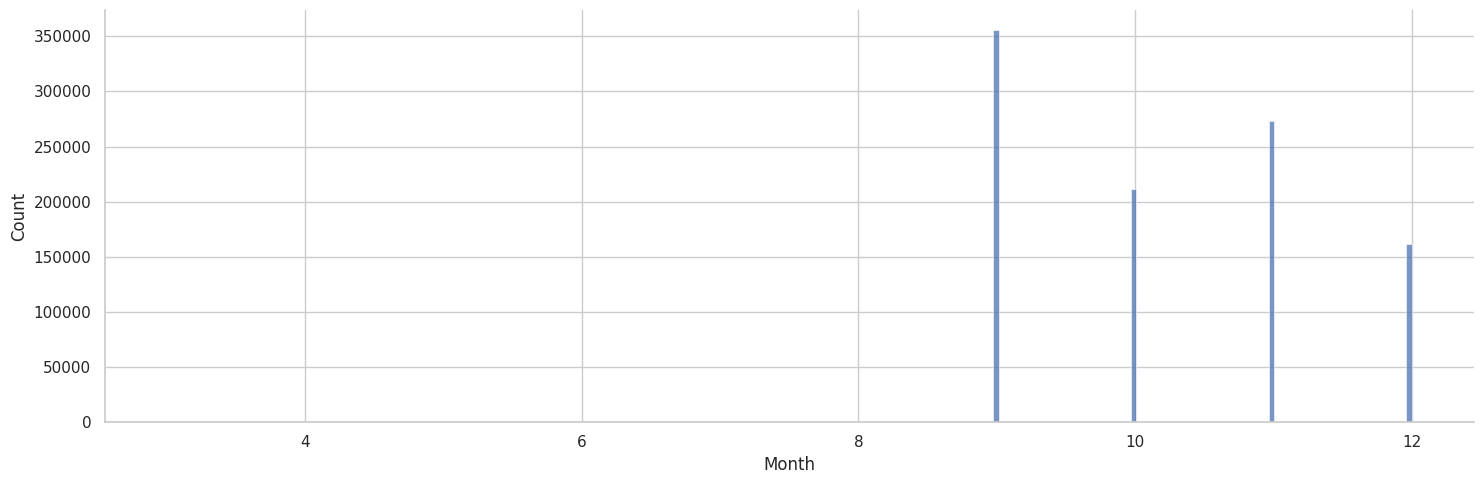

In [70]:
sns.displot(x=df["Month"], aspect=3)

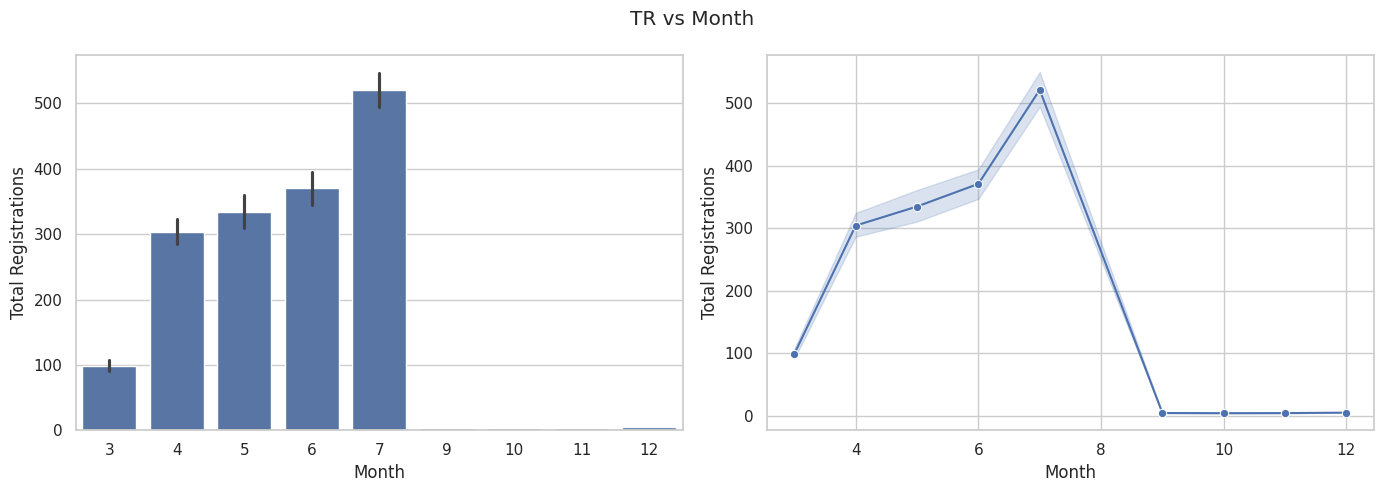

In [74]:
sns.set_theme(style="whitegrid")

fig, (axes) = plt.subplots(1,2,figsize=(14, 5))
fig.suptitle("TR vs Month")
sns.barplot(data=df, x="Month", y="Total Registrations",ax=axes[0])
sns.lineplot(data=df, x="Month", y="Total Registrations", marker='o',ax=axes[1])

plt.tight_layout()
plt.show()

In [50]:
# Most enrollment entries have been done towards Year end.
# But the total registrations are very less in volume during the Year end
# Maximum Aggregate total registrations happen from Month 5-7. 8th is completely empty!!

<Axes: xlabel='Month'>

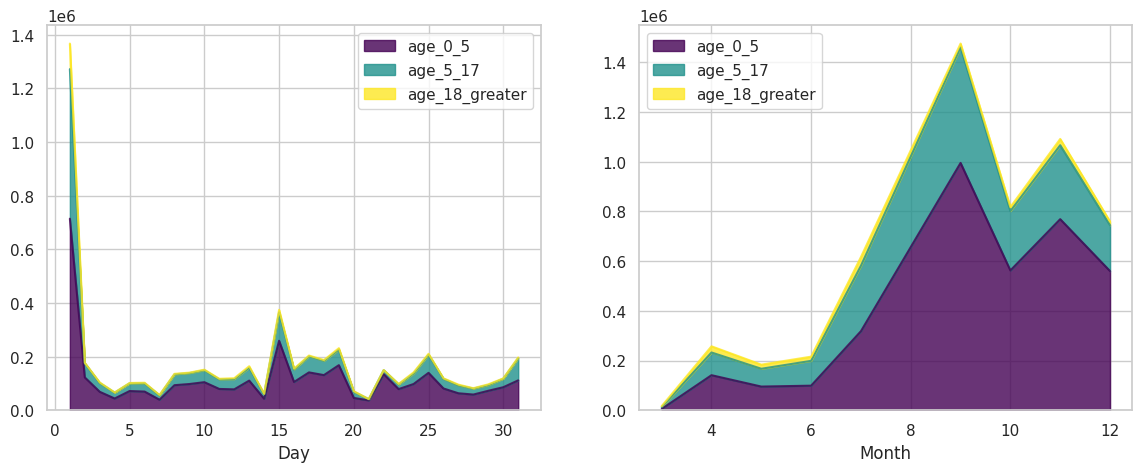

In [85]:
fig, (axes) = plt.subplots(1,2,figsize=(14, 5))

daily_agg = df.groupby('Day')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
daily_agg.plot(kind='area', stacked=True, alpha=0.8, colormap='viridis',ax=axes[0])

daily_agg = df.groupby('Month')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
daily_agg.plot(kind='area', stacked=True, alpha=0.8, colormap='viridis',ax=axes[1])

In [86]:
# Highest contribution seems to be done by Age(0 to 5), followed by Age(5 to 17) and then 18+